In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("train.csv")
df.drop('Loan_ID', inplace=True, axis='columns')
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)
df['Married'].fillna(df['Married'].mode()[0], inplace = True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace = True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace = True)

df1 = df.loc[:,['LoanAmount','Loan_Amount_Term']]

from sklearn.ensemble import RandomForestRegressor

imp = IterativeImputer(RandomForestRegressor(), max_iter=1000, random_state=0)
df1 = pd.DataFrame(imp.fit_transform(df1), columns=df1.columns)

df['LoanAmount'] = df1['LoanAmount']
df['Loan_Amount_Term'] = df1['Loan_Amount_Term']

df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [5]:
df['Gender'] = df['Gender'].map({'Male':0,'Female':1}).astype(int)
df['Married'] = df['Married'].map({'No':0,'Yes':1}).astype(int)
df['Education'] = df['Education'].map({'Not Graduate':0,'Graduate':1}).astype(int)
df['Self_Employed'] = df['Self_Employed'].map({'No':0,'Yes':1}).astype(int)
df['Credit_History'] = df['Credit_History'].astype(int)
df['Property_Area'] = df['Property_Area'].map({'Urban':0,'Rural':1, 'Semiurban':2}).astype(int)
df['Dependents'] = df['Dependents'].map({'0':0, '1':1, '2':2, '3+':3})

df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.drop(['ApplicantIncome', 'CoapplicantIncome'], axis='columns', inplace=True)

df['Loan_Status'] = df['Loan_Status'].map({'N':0,'Y':1}).astype(int)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,0,0,1,0,146.591421,360.0,1,0,1,5849.0
1,0,1,1,1,0,128.000000,360.0,1,1,0,6091.0
2,0,1,0,1,1,66.000000,360.0,1,0,1,3000.0
3,0,1,0,0,0,120.000000,360.0,1,0,1,4941.0
4,0,0,0,1,0,141.000000,360.0,1,0,1,6000.0


In [6]:
x = df.drop('Loan_Status', axis='columns')
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=3)

In [7]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

from sklearn import metrics

dtree_pred = dtree.predict(X_test)
acc1 = metrics.accuracy_score(y_test,dtree_pred)
print("Accuracy Score =", format(acc1))

Accuracy Score = 0.7073170731707317


In [8]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)
acc2 = metrics.accuracy_score(y_test, rfc_pred)
print("Accuracy_Score =", format(acc1))


Accuracy_Score = 0.7073170731707317


In [9]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train,y_train)

logreg.predict(X_test)

logreg_pred = logreg.predict(X_test)
acc3 = metrics.accuracy_score(y_test, logreg_pred)
print("Accuracy_Score =", format(acc3))

Accuracy_Score = 0.8536585365853658


In [10]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

gnb_pred = gnb.predict(X_test)
acc4 = metrics.accuracy_score(y_test, gnb_pred)
print("Accuracy_Score =", format(acc4))

Accuracy_Score = 0.8536585365853658


In [11]:
from sklearn import svm
svm_model = svm.SVC(kernel = 'linear', random_state = 0, C=1.0)
svm_model.fit(X_train, y_train)

svm_pred = svm_model.predict(X_test)
acc5 = metrics.accuracy_score(y_test, svm_pred)
print("Accuracy_Score =", format(acc5))

Accuracy_Score = 0.8373983739837398


In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)
X_train1 = lda.fit_transform(X_train, y_train)
X_test1 = lda.transform(X_test)

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train1, y_train)
ldarf_pred = classifier.predict(X_test1)
acc6 = metrics.accuracy_score(y_test, ldarf_pred)
print("Accuracy_Score =", format(acc6))

Accuracy_Score = 0.8536585365853658


In [13]:
y_lg_prob = logreg.predict_proba(X_test)[:,1]
y_rfc_prob = rfc.predict_proba(X_test)[:,1]

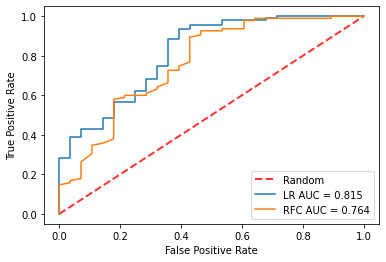

In [14]:
fpr, tpr, _ = metrics.roc_curve(y_test,y_lg_prob)
auc = metrics.roc_auc_score(y_test, y_lg_prob)

fpr1, tpr1, _1 = metrics.roc_curve(y_test,y_rfc_prob)
auc1 = metrics.roc_auc_score(y_test, y_rfc_prob)

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Random', alpha=.8)
plt.plot(fpr,tpr,label="LR AUC = "+str(round(auc,3)))
plt.plot(fpr1,tpr1,label="RFC AUC = "+str(round(auc1,3)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [15]:
print("Loogistic Regression AUC score:",auc)
print("Random Forest AUC score:",auc1)

Loogistic Regression AUC score: 0.8146616541353384
Random Forest AUC score: 0.7644736842105263


<AxesSubplot:>

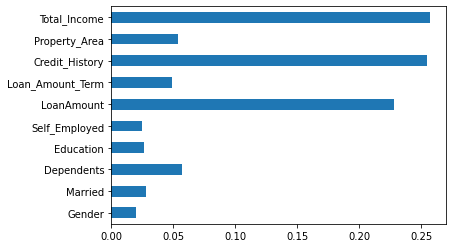

In [16]:
(pd.Series(rfc.feature_importances_, index=X_train.columns).plot(kind='barh'))